In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
# Load the data from Google Drive
y = np.load('/content/gdrive/MyDrive/ECG/arr2D_AF&SR_label.npy')
X = np.load('/content/gdrive/MyDrive/ECG/items_AF&SR.npy')

In [3]:
import numpy as np

# Assuming arr is your (6428, 5000, 12) shaped array
arr = X
# Indices to remove from the third dimension
indices_to_remove = [2]  # 1st, 3rd, 7th, 8th positions

# Remove the specified positions from the third dimension
arr = np.delete(arr, indices_to_remove, axis=2)
print(arr.shape)

(3587, 1000, 2)


In [15]:
m= X[2]
m

array([[-0.47 , -0.43 , -0.72 ],
       [-0.47 , -0.43 , -0.72 ],
       [-0.47 , -0.43 , -0.72 ],
       ...,
       [-0.064,  0.111,  0.471],
       [-0.075,  0.11 ,  0.467],
       [-0.081,  0.11 ,  0.458]])

In [ ]:
print(X.shape)
print(X)

(3587, 1000, 3)
[[[ 0.135 -0.125 -0.08 ]
  [ 0.135 -0.125 -0.08 ]
  [ 0.135 -0.125 -0.08 ]
  ...
  [-0.125 -0.066 -0.07 ]
  [-0.126 -0.063 -0.07 ]
  [-0.124 -0.06  -0.07 ]]

 [[-0.13  -0.045 -0.03 ]
  [-0.13  -0.045 -0.03 ]
  [-0.13  -0.045 -0.03 ]
  ...
  [ 0.003  0.027 -0.02 ]
  [ 0.005  0.025 -0.018]
  [ 0.005  0.024 -0.015]]

 [[-0.47  -0.43  -0.72 ]
  [-0.47  -0.43  -0.72 ]
  [-0.47  -0.43  -0.72 ]
  ...
  [-0.064  0.111  0.471]
  [-0.075  0.11   0.467]
  [-0.081  0.11   0.458]]

 ...

 [[ 0.025 -0.065  0.06 ]
  [ 0.025 -0.065  0.06 ]
  [ 0.025 -0.065  0.06 ]
  ...
  [-0.012 -0.035 -0.018]
  [-0.018 -0.006 -0.016]
  [-0.02   0.013 -0.021]]

 [[ 0.15   0.15   0.02 ]
  [ 0.15   0.15   0.02 ]
  [ 0.15   0.15   0.02 ]
  ...
  [ 0.121  0.05   0.063]
  [ 0.146  0.049  0.067]
  [ 0.166  0.052  0.071]]

 [[ 0.015  0.095 -0.005]
  [ 0.015  0.095 -0.005]
  [ 0.015  0.095 -0.005]
  ...
  [-0.102  0.113 -0.13 ]
  [-0.099  0.124 -0.129]
  [-0.1    0.125 -0.124]]]


In [5]:
# Preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

print(X_scaled)

[[[ 0.80705828 -0.4588596  -0.25228113]
  [ 0.80705828 -0.4588596  -0.25228113]
  [ 0.80705828 -0.4588596  -0.25228113]
  ...
  [-0.71186622 -0.24757386 -0.22215566]
  [-0.71770824 -0.23683052 -0.22215566]
  [-0.7060242  -0.22608717 -0.22215566]]

 [[-0.7410763  -0.17237046 -0.10165378]
  [-0.7410763  -0.17237046 -0.10165378]
  [-0.7410763  -0.17237046 -0.10165378]
  ...
  [ 0.035912    0.08546976 -0.07152831]
  [ 0.04759603  0.07830753 -0.06550321]
  [ 0.04759603  0.07472642 -0.05646557]]

 [[-2.72736219 -1.55109943 -2.18031125]
  [-2.72736219 -1.55109943 -2.18031125]
  [-2.72736219 -1.55109943 -2.18031125]
  ...
  [-0.35550316  0.38628336  1.4076323 ]
  [-0.41976535  0.38270224  1.39558212]
  [-0.45481746  0.38270224  1.36846919]]

 ...

 [[ 0.16443638 -0.24399274  0.16947546]
  [ 0.16443638 -0.24399274  0.16947546]
  [ 0.16443638 -0.24399274  0.16947546]
  ...
  [-0.05171826 -0.13655932 -0.06550321]
  [-0.08677037 -0.03270701 -0.05947812]
  [-0.0984544   0.03533416 -0.07454085]]

 [

In [6]:
import numpy as np

# Assuming X and Y are your arrays
X_s = X_scaled
Y_s = y
# Generate indices for splitting
indices = np.arange(len(Y_s))

# Split the indices into train and test sets
test_indices = indices[::5]  # Every fifth index
train_indices = np.setdiff1d(indices, test_indices)

# Split X and Y using the generated indices
X_tr = X_s[train_indices]
Y_tr = Y_s[train_indices]

X_ts = X_s[test_indices]
Y_ts = Y_s[test_indices]

# Check the shapes
print("X_train shape:", X_tr.shape)
print("Y_train shape:", Y_tr.shape)
print("X_test shape:", X_ts.shape)
print("Y_test shape:", Y_ts.shape)

X_train shape: (2869, 1000, 3)
Y_train shape: (2869, 1)
X_test shape: (718, 1000, 3)
Y_test shape: (718, 1)


# **Teacher Model**

In [7]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional, Conv1D, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define model parameters
num_classes = 2
input_shape = (1000, 3)  # assuming 1000 time steps and 3 features

# Define LSTM-based teacher model architecture
def teacher_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(256, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(512, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(1024, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(2048, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Bidirectional(LSTM(128, return_sequences=True)),
        Bidirectional(LSTM(64)),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate the model
teacher_model = teacher_model(input_shape, num_classes)

# Compile the model
teacher_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Print model summary
teacher_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 998, 64)           640       
                                                                 
 max_pooling1d (MaxPooling1  (None, 499, 64)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 497, 128)          24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 248, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 246, 256)          98560     
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 123, 256)          0

# **Train Teacher (individual, no KD)**

In [ ]:
# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, mode='max', restore_best_weights=True)

# Train the model
teacher_model.fit(X_tr, Y_tr, epochs=50, batch_size=32, validation_split=0.3, callbacks=[checkpoint, early_stopping])

# Load the best model
teacher_model.load_weights('best_model.h5')

# Evaluate the model on test data
loss, accuracy = teacher_model.evaluate(X_ts, Y_ts)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
63/63 [==============================] - 3s 50ms/step - loss: 0.0425 - accuracy: 0.9856 - val_loss: 0.3241 - val_accuracy: 0.9164
Epoch 2/50
63/63 [==============================] - 3s 50ms/step - loss: 0.0788 - accuracy: 0.9671 - val_loss: 0.2675 - val_accuracy: 0.9187
Epoch 3/50
63/63 [==============================] - 3s 44ms/step - loss: 0.0684 - accuracy: 0.9741 - val_loss: 0.2409 - val_accuracy: 0.9152
Epoch 4/50
63/63 [==============================] - 3s 47ms/step - loss: 0.0294 - accuracy: 0.9875 - val_loss: 0.2850 - val_accuracy: 0.9268
Epoch 5/50
63/63 [==============================] - 3s 42ms/step - loss: 0.0568 - accuracy: 0.9791 - val_loss: 0.3114 - val_accuracy: 0.9036
Epoch 6/50
63/63 [==============================] - 3s 46ms/step - loss: 0.0408 - accuracy: 0.9861 - val_loss: 0.2959 - val_accuracy: 0.9245
Epoch 7/50
63/63 [==============================] - 3s 51ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.2951 - val_accuracy: 0.9315
Epoch 8/50
63

# **Student Model**

In [8]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define model parameters
num_classes = 2
input_shape = (1000, 3)  # assuming 1000 time steps and 3 features

def student_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(16, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(16, return_sequences=True),
        LSTM(8),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate and compile the student model
student_model = student_model(input_shape, num_classes)
student_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
student_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 998, 16)           160       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 499, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 497, 32)           1568      
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 248, 32)           0         
 g1D)                                                            
                                                                 
 dropout (Dropout)           (None, 248, 32)           0         
                                                                 
 lstm_2 (LSTM)               (None, 248, 16)          

# **Train Student (Individual, no KD)**

In [9]:
# Define callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)

# Train the model
student_model.fit(X_tr, Y_tr, epochs=10, batch_size=32, validation_split=0.3, callbacks=[checkpoint, early_stopping])

# Load the best model
student_model.load_weights('best_model.h5')

# Evaluate the model on test data
loss, accuracy = student_model.evaluate(X_ts, Y_ts)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
63/63 [==============================] - 13s 73ms/step - loss: 0.6892 - accuracy: 0.5393 - val_loss: 0.6824 - val_accuracy: 0.5645
Epoch 2/10
 1/63 [..............................] - ETA: 2s - loss: 0.6724 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 3s 43ms/step - loss: 0.6722 - accuracy: 0.5832 - val_loss: 0.6516 - val_accuracy: 0.6109
Epoch 3/10
63/63 [==============================] - 4s 57ms/step - loss: 0.6529 - accuracy: 0.6180 - val_loss: 0.6562 - val_accuracy: 0.5947
Epoch 4/10
63/63 [==============================] - 3s 45ms/step - loss: 0.6455 - accuracy: 0.6320 - val_loss: 0.6235 - val_accuracy: 0.6609
Epoch 5/10
63/63 [==============================] - 1s 23ms/step - loss: 0.6455 - accuracy: 0.6429 - val_loss: 0.6362 - val_accuracy: 0.6423
Epoch 6/10
63/63 [==============================] - 1s 23ms/step - loss: 0.6409 - accuracy: 0.6599 - val_loss: 0.6266 - val_accuracy: 0.6736
Epoch 7/10
63/63 [==============================] - 1s 20ms/step - loss: 0.6953 - accuracy: 0.5309 - val_loss: 0.6864 - val_accuracy: 0.5598
Epoch 8/10
63/63 [==============================] - 1s 20ms/step - loss: 0.6855 - accuracy: 0.5558 - val_loss: 0.6828 - val_accuracy: 0.5598
Epoch 9/10
63/63 [======

In [10]:
student_model.save('model.h5')
from google.colab import files

# Download the saved model file
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **KD Training**

In [ ]:
import tensorflow as tf
from keras import Model
from keras.losses import KLDivergence

# Custom training step for knowledge distillation
class DistillationModel(Model):
    def __init__(self, student, teacher, alpha=0.1, temperature=3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher
        self.alpha = alpha
        self.temperature = temperature
        self.student_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
        self.distillation_loss_fn = KLDivergence()
        self.best_accuracy = 0.0
        self.best_student_weights = None

    def compile(self, optimizer, metrics):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
        self.distillation_loss_fn = KLDivergence()

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1)
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss * (self.temperature ** 2)

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))

        self.compiled_metrics.update_state(y, student_predictions)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data
        y_pred = self.student(x, training=False)
        loss = self.student_loss_fn(y, y_pred)

        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')
        if current_val_accuracy is not None and current_val_accuracy > self.best_accuracy:
            self.best_accuracy = current_val_accuracy
            self.best_student_weights = self.student.get_weights()

    def get_best_accuracy(self):
        return self.best_accuracy

    def get_best_student_weights(self):
        return self.best_student_weights

# Instantiate and compile the distillation model
distillation_model = DistillationModel(student=student_model, teacher=teacher_model, alpha=0.1, temperature=2)
distillation_model.compile(optimizer='adam', metrics=['accuracy'])

# Train the student model with knowledge distillation
history = distillation_model.fit(X_tr, Y_tr, epochs=50, batch_size=32, validation_split=0.2)

# Retrieve the best validation accuracy and corresponding student weights
best_accuracy = distillation_model.get_best_accuracy()
best_student_weights = distillation_model.get_best_student_weights()

# Set the best weights to the student model for final evaluation
if best_student_weights is not None:
    student_model.set_weights(best_student_weights)

# Evaluate on test data
test_loss, test_accuracy = student_model.evaluate(X_ts, Y_ts)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
72/72 [==============================] - 10s 40ms/step - accuracy: 0.5621 - val_accuracy: 0.5645
Epoch 2/50
72/72 [==============================] - 2s 28ms/step - accuracy: 0.5908 - val_accuracy: 0.5993
Epoch 3/50
72/72 [==============================] - 2s 27ms/step - accuracy: 0.6148 - val_accuracy: 0.6010
Epoch 4/50
72/72 [==============================] - 2s 28ms/step - accuracy: 0.6349 - val_accuracy: 0.6551
Epoch 5/50
72/72 [==============================] - 2s 29ms/step - accuracy: 0.6340 - val_accuracy: 0.6672
Epoch 6/50
72/72 [==============================] - 2s 34ms/step - accuracy: 0.6471 - val_accuracy: 0.6760
Epoch 7/50
72/72 [==============================] - 2s 31ms/step - accuracy: 0.6658 - val_accuracy: 0.6585
Epoch 8/50
72/72 [==============================] - 2s 28ms/step - accuracy: 0.6693 - val_accuracy: 0.6864
Epoch 9/50
72/72 [==============================] - 2s 28ms/step - accuracy: 0.6758 - val_accuracy: 0.6707
Epoch 10/50
72/72 [=================

In [ ]:
import tensorflow as tf
from keras import Model
from keras.losses import KLDivergence

# Custom training step for knowledge distillation
class DistillationModel(Model):
    def __init__(self, student, teacher, alpha=0.1, temperature=3):
        super(DistillationModel, self).__init__()
        self.student = student
        self.teacher = teacher
        self.alpha = alpha
        self.temperature = temperature
        self.student_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
        self.distillation_loss_fn = KLDivergence()
        self.best_accuracy = 0.0
        self.best_student_weights = None

    def compile(self, optimizer, metrics):
        super(DistillationModel, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
        self.distillation_loss_fn = KLDivergence()

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)

        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_fn(y, student_predictions)
            distillation_loss = self.distillation_loss_fn(
                tf.nn.softmax(teacher_predictions / self.temperature, axis=1),
                tf.nn.softmax(student_predictions / self.temperature, axis=1)
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss * (self.temperature ** 2)

        gradients = tape.gradient(loss, self.student.trainable_variables)
        self.optimizer.apply_gradients(zip(gradients, self.student.trainable_variables))

        self.compiled_metrics.update_state(y, student_predictions)
        return {m.name: m.result() for m in self.metrics}

    def test_step(self, data):
        x, y = data
        y_pred = self.student(x, training=False)
        loss = self.student_loss_fn(y, y_pred)

        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')
        if current_val_accuracy is not None and current_val_accuracy > self.best_accuracy:
            self.best_accuracy = current_val_accuracy
            self.best_student_weights = self.student.get_weights()

    def get_best_accuracy(self):
        return self.best_accuracy

    def get_best_student_weights(self):
        return self.best_student_weights

# Instantiate and compile the distillation model
distillation_model = DistillationModel(student=student_model, teacher=teacher_model, alpha=0.01, temperature=2)
distillation_model.compile(optimizer='adam', metrics=['accuracy'])

# Train the student model with knowledge distillation
history = distillation_model.fit(X_tr, Y_tr, epochs=50, batch_size=32, validation_split=0.2)

# Retrieve the best validation accuracy and corresponding student weights
best_accuracy = distillation_model.get_best_accuracy()
best_student_weights = distillation_model.get_best_student_weights()

# Set the best weights to the student model for final evaluation
if best_student_weights is not None:
    student_model.set_weights(best_student_weights)

# Evaluate on test data
test_loss, test_accuracy = student_model.evaluate(X_ts, Y_ts)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
72/72 [==============================] - 54s 645ms/step - accuracy: 0.4954 - val_accuracy: 0.4843
Epoch 2/50
72/72 [==============================] - 45s 629ms/step - accuracy: 0.4963 - val_accuracy: 0.5592
Epoch 3/50
72/72 [==============================] - 47s 654ms/step - accuracy: 0.5142 - val_accuracy: 0.5523
Epoch 4/50
72/72 [==============================] - 46s 635ms/step - accuracy: 0.5325 - val_accuracy: 0.5976
Epoch 5/50
72/72 [==============================] - 46s 639ms/step - accuracy: 0.5691 - val_accuracy: 0.5540
Epoch 6/50
72/72 [==============================] - 46s 634ms/step - accuracy: 0.5769 - val_accuracy: 0.5889
Epoch 7/50
72/72 [==============================] - 45s 629ms/step - accuracy: 0.5965 - val_accuracy: 0.6359
Epoch 8/50
72/72 [==============================] - 45s 628ms/step - accuracy: 0.5961 - val_accuracy: 0.6254
Epoch 9/50
72/72 [==============================] - 46s 634ms/step - accuracy: 0.6044 - val_accuracy: 0.6185
Epoch 10/50
72/72 [

23/23 [==============================] - 2s 13ms/step


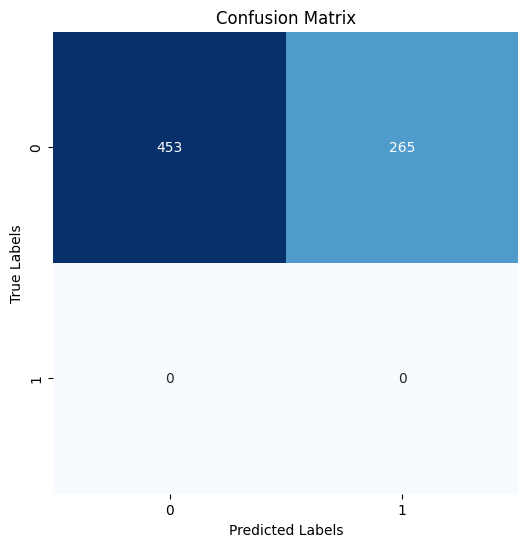

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       718
           1       0.00      0.00      0.00         0

    accuracy                           0.63       718
   macro avg       0.50      0.32      0.39       718
weighted avg       1.00      0.63      0.77       718



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have predictions and true labels from your test set
y_pred = student_model.predict(X_ts)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels
y_true = np.argmax(Y_ts, axis=1)  # Assuming Y_test is one-hot encoded

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as an image
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Compute precision, recall, f1-score
print(classification_report(y_true, y_pred_classes))

In [11]:
import pandas as pd
import numpy as np
from keras.models import load_model
df=pd.read_csv("/content/gdrive/MyDrive/ECG/sample_ecg.csv")
array = df.iloc[:, 0].values
array_parts = np.array_split(array, 3)
filtered_parts = [part[:1000] for part in array_parts]
result_array = []
for i in range(1000):
    result_array.append([part[i] for part in filtered_parts])
result_array = np.array(result_array)
sample= result_array
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Sample_scaled = scaler.fit_transform(sample.reshape(-1, sample.shape[-1])).reshape(sample.shape)
print(Sample_scaled)


[[ 0.99749133 -1.55768829 -1.56439326]
 [ 0.96832246 -2.11534591 -2.12998041]
 [ 0.93681225 -2.46297411 -2.48415649]
 ...
 [-0.30644964 -0.14833662 -0.16149087]
 [-0.29590658 -0.14184632 -0.15546107]
 [-0.29149532 -0.13285674 -0.14353196]]


In [22]:
import numpy as np
from keras.models import load_model

student_model = load_model('/content/gdrive/MyDrive/ECG/student_KD_model.h5')
sample = np.array(Sample_scaled)
pred = student_model.predict(sample)
label = ['Normal SR' if pred == 0 else 'Abnormal AF']
print(f"Prediction for array: {label}")

Prediction for array: Normal SR
